# PCA Process

### 1. Import packages and features formulas from utils

In [2]:
from utils.feature_utils import extract_log_features, extract_hog_features, extract_normals_features, extract_gabor_features, extract_wavelet_features, extract_bovw_features, create_visual_vocab
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.manifold import TSNE
import os
from PIL import Image


In [7]:
# Import training data from pickle file (scalars)

filename = './pkls/train_0406.pkl'
train_df = pd.read_pickle(filename)
train_df.head()

,label,category,0,1,2,3,4,5,6,7,...,22,23,24,25,26,27,28,29,30,31
0,0,Blended,3441.793288,2.028531e+07,1844.056770,0.150226,346.120911,0.005210,0.000093,0.000063,...,0.027344,0.054688,0.035156,0.039062,0.031250,0.027344,0.046875,0.062500,0.050781,0.050781
1,1,Denim,7211.992783,7.747671e+06,2271.840993,0.151475,348.998260,0.004833,-0.000067,0.000038,...,0.100000,0.048649,0.021622,0.024324,0.013514,0.021622,0.024324,0.043243,0.016216,0.070270
2,2,Polyester,8856.756862,5.854463e+06,1967.259618,0.160454,369.684998,0.002032,-0.000002,0.000008,...,0.027778,0.004630,0.004630,0.250000,0.129630,0.194444,0.018519,0.004630,0.027778,0.004630
3,0,Blended,7018.112788,7.817569e+06,1953.124972,0.152300,350.899200,0.004582,0.000011,0.000034,...,0.052239,0.063433,0.052239,0.007463,0.022388,0.044776,0.085821,0.074627,0.033582,0.029851
4,3,Cotton,7932.263905,6.971318e+06,2053.412469,0.157971,363.965454,0.002823,-0.000003,0.000017,...,0.030612,0.047619,0.054422,0.047619,0.051020,0.081633,0.013605,0.044218,0.047619,0.054422


In [14]:
# Create the images array, each row is one image
#Convert images to feature array and find labels"
def parse_img(folder_path):
    image_vectors = []  # image data\n",
    labels = []  # labels\n",

    for filename in os.listdir(folder_path):
        if filename.endswith(".png"):
            parts = filename.split('_')
            fabType = parts[0]
            image = Image.open(os.path.join(folder_path, filename)).convert('L')
            img_array = np.array(image)

            # normalize the image vector to be between 0 and 1 \n",
            img_array_std = (img_array - np.mean(img_array)) / np.std(img_array)
            img_array = np.array(img_array_std)
            image_vectors.append(img_array)
            labels.append(fabType)

    X = np.array(image_vectors)
    Y = np.array(labels)
    return X, Y

### PCA over Scalar Features

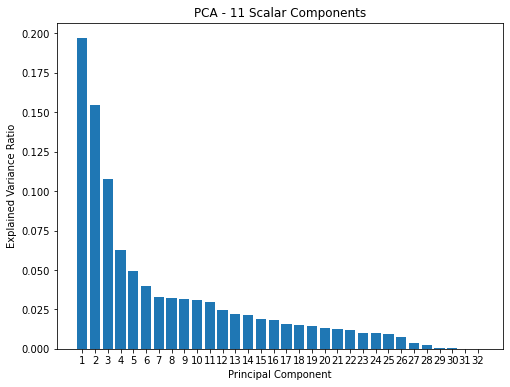

In [4]:
# isolate the feature columns 
features = train_df.iloc[:, 2:]

# standardize the features (important for PCA)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# perform PCA
pca = PCA()
pca.fit(features_scaled)

# create a scree plot (explained variance ratios)
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA - 11 Scalar Components')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))  # Ensure x-ticks for each component
plt.show()

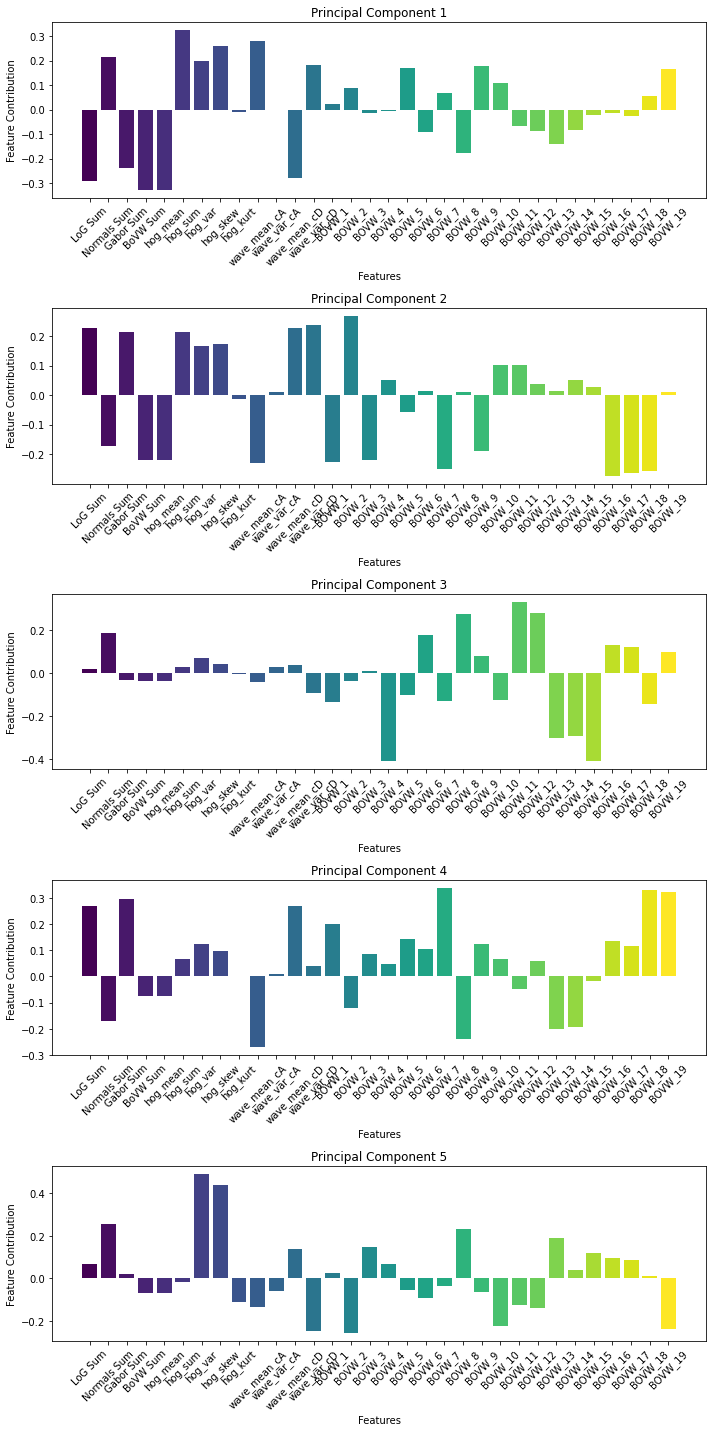

In [12]:
# Number of features and feature names
N = len(pca.components_[0])
feature_names = ['LoG Sum', 'Normals Sum', 'Gabor Sum', 'BoVW Sum', 'hog_mean', 
                 'hog_sum', 'hog_var', 'hog_skew', 'hog_kurt', 'wave_mean_cA', 
                 'wave_var_cA', 'wave_mean_cD', 'wave_var_cD','BOVW_1',
                 'BOVW_2',
                 'BOVW_3',
                 'BOVW_4',
                 'BOVW_5',
                 'BOVW_6',
                 'BOVW_7',
                 'BOVW_8',
                 'BOVW_9',
                 'BOVW_10',
                 'BOVW_11',
                 'BOVW_12',
                 'BOVW_13',
                 'BOVW_14',
                 'BOVW_15',
                 'BOVW_16',
                 'BOVW_17',
                 'BOVW_18',
                 'BOVW_19']

# Check if the number of features matches the number of feature names
assert N == len(feature_names), "Number of features does not match number of feature names."

num_components = 5
colors = plt.cm.viridis(np.linspace(0, 1, N))

fig, axs = plt.subplots(num_components, 1, figsize=(10, num_components * 4))

for i in range(num_components):
    component = pca.components_[i]
    axs[i].bar(feature_names, component, color=colors)
    axs[i].set_title(f'Principal Component {i + 1}')
    axs[i].set_ylabel('Feature Contribution')
    axs[i].set_xlabel('Features')
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Sum of first 2 components: 0.35158972561521273


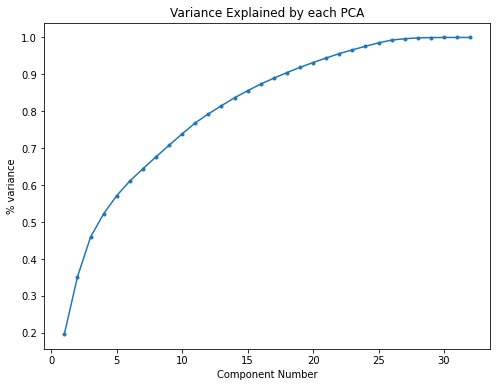

In [7]:
# PC1, PC2 component scores
print(f"Sum of first 2 components: {np.sum(pca.explained_variance_ratio_[:2])}")

variances = pca.explained_variance_ratio_

cumulatives = [] 

for i in range(len(variances)):
    if i == 0:
        cumulative = variances[i]  # For the first element, cumulative sum is the variance itself
    else:
        cumulative += variances[i]  # Accumulate the current variance to the previous cumulative sum
    cumulatives.append(cumulative)

cumulatives
# plot the explained variance (here we have to do it in the opposite side)
plt.figure(figsize=(8, 6))
plt.plot(np.arange(N)+1,
         cumulatives,
         marker='.');
plt.ylabel("% variance")
plt.xlabel("Component Number")
plt.title("Variance Explained by each PCA")
plt.show()

### PCA over Feature Vectors

Note: we selected randomply 10000 images because the memory crashed when trying to run them all


In [16]:
folder_path = './Subsamples/train'
in_imgs, label_imgs = parse_img(folder_path)

in_imgs.shape

(22128, 200, 200)

### Feature extraction

In [9]:
kmeans_fitted = create_visual_vocab(folder_path)

In [ ]:
#choose 10000 images randomly (too computationally heavy to un the 22K images)
random_indices = np.random.choice(len(in_imgs), size=10000, replace=False)

In [11]:
# Feature vector extraction
# in_imgs = X (image vectors), label_imgs = Y (labels)
#LOG
log_features_list = []

for idx in random_indices:
        image_array = in_imgs[idx]
        log_feature = extract_log_features(image_array,scalar=False)
        log_features_list.append(log_feature)

log_features = np.vstack(log_features_list)
print(log_features.shape)


(10000, 40000)


In [12]:
#HOG
hog_features_list = []

for idx in random_indices:
        image_array = in_imgs[idx]
        hog_feature = extract_hog_features(image_array, 4, 20, scalar=False)
        hog_features_list.append(hog_feature[np.newaxis, :])
hog_features = np.vstack(hog_features_list) 
print(hog_features.shape)

(10000, 2304)


In [13]:
#Normals downsample
import numpy as np
import cv2
from skimage.color import rgb2gray

def extract_normals_features_downsample(image_array, scalar=True):
    #preprocessing
    # convert to floating point image with intensity [0, 1]
    if np.max(image_array) > 1:
        img = image_array.astype(np.float32) / 255.0
    else:
        img = image_array
    # convert to grayscale
    if len(img.shape) > 2:
        img = rgb2gray(img)
    gray_img = img

    # Downsample the image by a factor of 2
    gray_img_downsampled = cv2.resize(gray_img, (0, 0), fx=0.5, fy=0.5)
    
    # Compute gradients using Sobel operator on the downsampled image
    sobel_x = cv2.Sobel(gray_img_downsampled, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray_img_downsampled, cv2.CV_64F, 0, 1, ksize=3)

    # Compute normal vectors Nx, Ny, Nz
    norm = np.sqrt(sobel_x**2 + sobel_y**2 + 1e-6)
    nx = sobel_x / norm
    ny = sobel_y / norm
    nz = 1 / norm

    # Concatenate nx, ny, nz along a new axis, and flatten it to form a 1D feature vector
    feature_vector = np.stack((nx, ny, nz), axis=-1).reshape(-1)
    
    if scalar:
        feature_scalar = np.sum(feature_vector)
        return feature_scalar
    else:
        return feature_vector

# Example usage:
# Assuming image_array is your array of images with shape (22128, 200, 200, 3)
# features = extract_normals_features(image_array)
# print(features.shape)


In [14]:
#Normals (is crashing in my computer with the 22K image_vector) - consider not to flatten in the original function
normals_features_list = []
for idx in random_indices:
    image_array = in_imgs[idx]
    normals_feature = extract_normals_features_downsample(image_array, scalar=False)
    normals_features_list.append(normals_feature)
normals_features = np.vstack(normals_features_list) #NOTE np.vstack  will stack them vertically, which would mean each row represents the features of an image. 
print(normals_features.shape)

(10000, 30000)


In [15]:
#Gabor features
gabor_features_list = []
for idx in random_indices:
    image_array = in_imgs[idx]
    gabor_feature = extract_gabor_features(image_array, frequency=0.6, theta=0, sigma=1.0, scalar=False)
    gabor_features_list.append(gabor_feature)
gabor_features = np.vstack(gabor_features_list)
print(gabor_features.shape)

(10000, 40000)


In [16]:
#Wavelet Features
wavelet_features_list = []
for idx in random_indices:
    image_array = in_imgs[idx]
    wavelet_feature = extract_wavelet_features(image_array, scalar=False)
    wavelet_features_list.append(wavelet_feature)
wavelet_features = np.vstack(wavelet_features_list)
print(wavelet_features.shape)

(10000, 40000)


In [17]:
#BoVW features
bovw_features_list = []
for idx in random_indices:
    image_array = in_imgs[idx]
    bovw_feature = extract_bovw_features(image_array, kmeans_fitted)
    bovw_features_list.append(bovw_feature)
bovw_features = np.vstack(bovw_features_list)
print(bovw_features.shape)

(10000, 20)


### Run PCA

In [18]:
# Functions from class example
def get_PCA(X_list, n_components=2):
  pca_list = []
  xpca_list = []
  for X in X_list:
    # .fit we are creating the axis
    pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X) #pca transformation, of each of our X (data structure), whiten=True (normalization step)
    #doing the transformation into the new axis
    X_pca = pca.transform(X)
    pca_list.append(pca)
    xpca_list.append(X_pca)
  return pca_list, xpca_list

def plot_PCA(X_list,labels, colors, n_components=2):
  pca_list, xpca_list = get_PCA(X_list, n_components=n_components)

  plt.figure(figsize=(15,5))
  for i in range(len(X_list)):
    plt.plot(np.cumsum(pca_list[i].explained_variance_ratio_), colors[i], label=labels[i])
  plt.xticks(np.arange(n_components)+1)
  plt.yticks(np.linspace(0, 1, 8))
  plt.grid(True)
  plt.xlabel('Number of components')
  plt.ylabel('Explained Variances')
  plt.legend()
  plt.show()

def get_tsne(X_list, n_components=2):
  xtsne_list = []
  for X in X_list:
    tsne = TSNE(n_components=n_components, random_state=0)
    X_tsne = tsne.fit_transform(X)
    xtsne_list.append(X_tsne)
  return xtsne_list

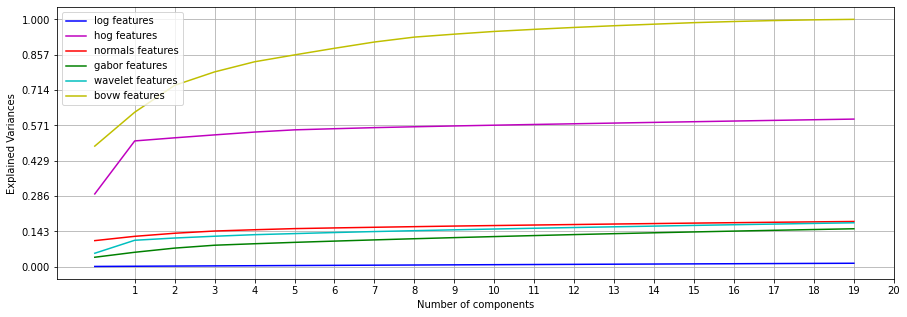

In [39]:
x = plot_PCA([log_features, 
              hog_features, 
              normals_features, 
              gabor_features, 
              wavelet_features,
              bovw_features], labels = ['log features', 
                                           'hog features', 
                                           'normals features', 
                                           'gabor features', 
                                           'wavelet features',
                                           'bovw features'], colors = ['b-', 'm-', 'r-', 'g-', 'c-', 'y-'],n_components=20)

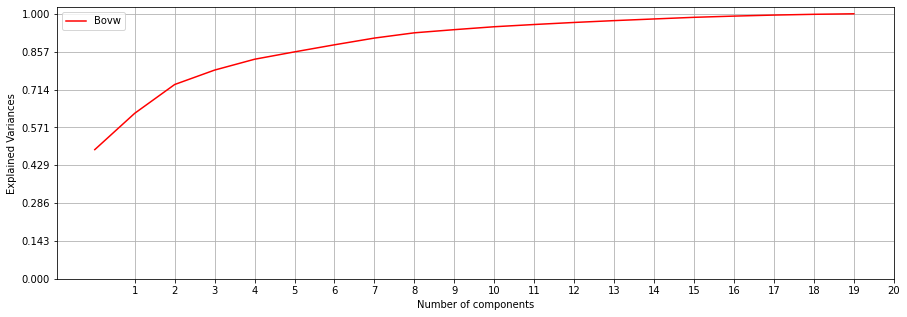

In [20]:
x_bovw = plot_PCA([bovw_features], ['Bovw'], ['r-'], n_components=20)

In [21]:
# dimensionality reduction
X_log_pca, X_hog_pca, X_normals_pca, X_gabor_pca, X_wavelet_pca, x_bovw_pca = get_PCA([log_features, hog_features, normals_features, gabor_features, wavelet_features, bovw_features], n_components=10)[-1]
X_log_tsne, X_hog_tsne, X_normals_tsne, X_gabor_tsne, X_wavelet_tsne, X_bovw_tsne = get_tsne([log_features, hog_features, normals_features, gabor_features, wavelet_features, bovw_features], n_components=2)

In [30]:
def plot_classes(X, label, ax, title):
  label_encoder = LabelEncoder()
  y = label_encoder.fit_transform(label)

  # color code each cluster (fabrics label (5))
  colormap = plt.cm.tab20
  colorst = [colormap(i) for i in np.linspace(0, 1.0, len(np.unique(y)))]

  # project the features into 2 dimensions
  for k in range(len(np.unique(y))):
    ax.scatter(X[y==k, 0], X[y==k, 1], alpha=0.5, facecolors=colorst[k])
  
  ax.set_title(title)

In [31]:
labels = []
for idx in random_indices:
    label = label_imgs[idx]
    labels.append(label)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


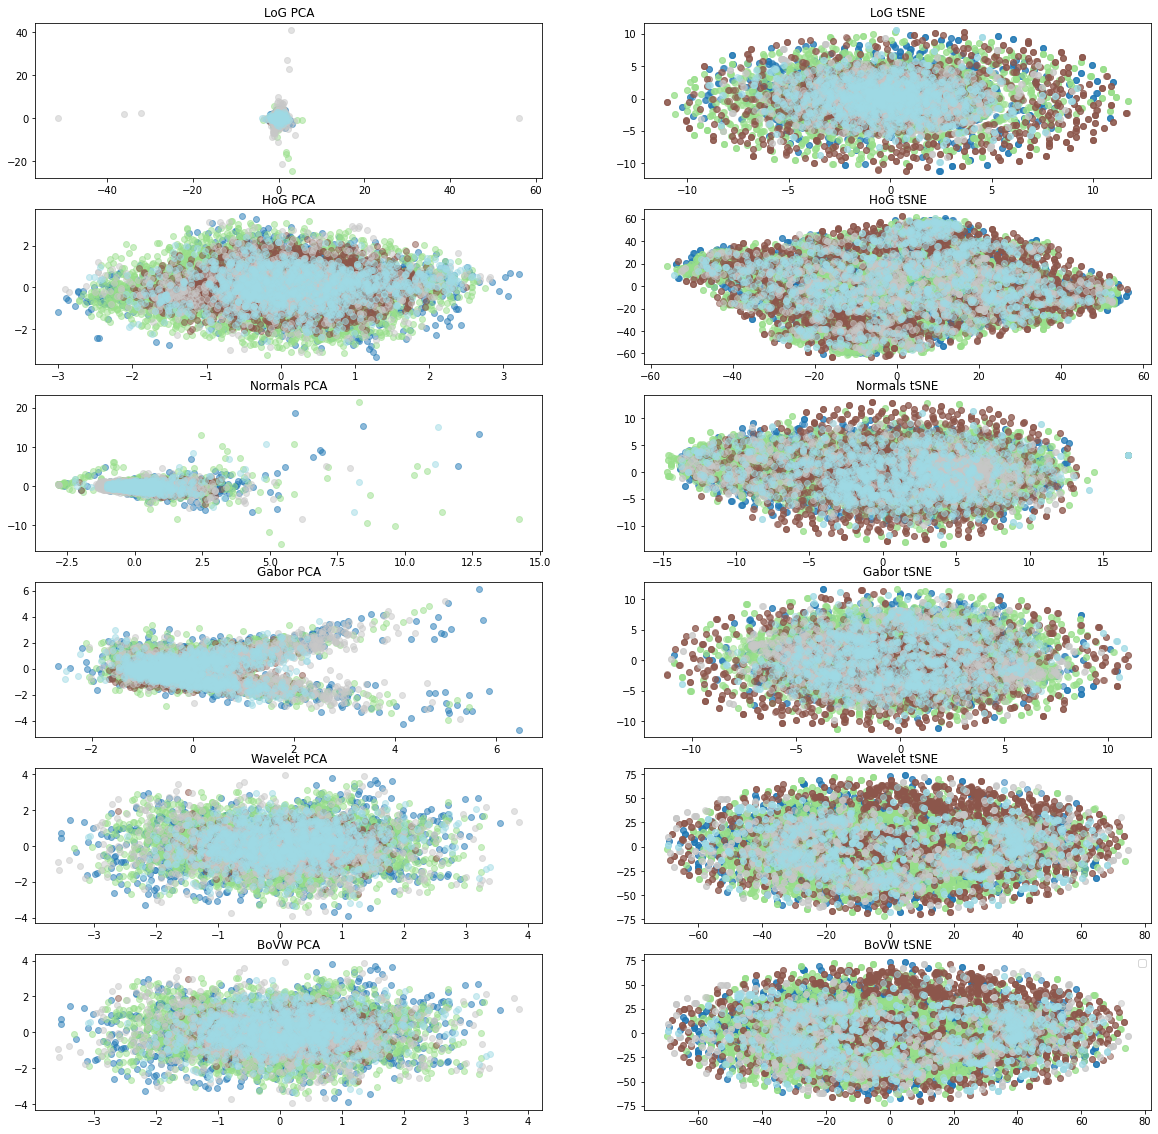

In [34]:
# plot results
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(20,20))

# y is the class labels (fabric=denim, wool, polyester, blended, )
plot_classes( X_log_pca, labels, ax[0,0], title='LoG PCA')
plot_classes(X_log_tsne, labels, ax[0,1], title='LoG tSNE')

plot_classes( X_hog_pca, labels, ax[1,0], title='HoG PCA')
plot_classes(X_hog_tsne, labels, ax[1,1], title='HoG tSNE')

plot_classes( X_normals_pca, labels, ax[2,0], title='Normals PCA')
plot_classes(X_normals_tsne, labels, ax[2,1], title='Normals tSNE')

plot_classes( X_gabor_pca, labels, ax[3,0], title='Gabor PCA')
plot_classes(X_gabor_tsne, labels, ax[3,1], title='Gabor tSNE')

plot_classes( X_wavelet_pca, labels, ax[4,0], title='Wavelet PCA')
plot_classes(X_wavelet_tsne, labels, ax[4,1], title='Wavelet tSNE')
plot_classes( X_wavelet_pca, labels, ax[5,0], title='BoVW PCA')
plot_classes(X_wavelet_tsne, labels, ax[5,1], title='BoVW tSNE')
plt.legend()
plt.show()